In [239]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [240]:
species_df = pd.read_csv('species_info.csv');
observ_df = pd.read_csv('observations.csv');

#pd.set_option('display.max_columns', None);
pd.set_option('display.expand_frame_repr', False);

biodiversity_df = pd.merge(species_df, observ_df, on = 'scientific_name', how = 'outer');
print(biodiversity_df);


             category                scientific_name                                       common_names conservation_status                            park_name  observations
0              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN                  Bryce National Park           130
1              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN            Yellowstone National Park           270
2              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN  Great Smoky Mountains National Park            98
3              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN               Yosemite National Park           117
4              Mammal                      Bos bison                              American Bison, Bison                 NaN  

In [241]:
print(biodiversity_df.columns);
print(biodiversity_df.category.unique());

Index(['category', 'scientific_name', 'common_names', 'conservation_status',
       'park_name', 'observations'],
      dtype='object')
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [242]:
print(biodiversity_df.dtypes);

category               object
scientific_name        object
common_names           object
conservation_status    object
park_name              object
observations            int64
dtype: object


In [243]:
print(biodiversity_df.isna().sum());

category                   0
scientific_name            0
common_names               0
conservation_status    24752
park_name                  0
observations               0
dtype: int64


In [244]:
duplicates = biodiversity_df.duplicated();
print(duplicates.value_counts());

False    25601
True        31
dtype: int64


In [245]:
biodiversity_df = biodiversity_df.drop_duplicates();
duplicates_bio = biodiversity_df.duplicated();
print(duplicates_bio.value_counts());


False    25601
dtype: int64


In [246]:
biodiversity_df = biodiversity_df.reset_index(drop=True);
print(biodiversity_df);

             category                scientific_name                                       common_names conservation_status                            park_name  observations
0              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN                  Bryce National Park           130
1              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN            Yellowstone National Park           270
2              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN  Great Smoky Mountains National Park            98
3              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN               Yosemite National Park           117
4              Mammal                      Bos bison                              American Bison, Bison                 NaN  

In [247]:
unique_park_name_list = list(biodiversity_df.park_name.unique());
unique_sc_name_list = list(biodiversity_df.scientific_name.unique());
biodiversity_list = list(range(0,len(biodiversity_df)));
index_loc = 0;

def create_park_columns(p_name):
    biodiversity_df[p_name] = biodiversity_df.apply(lambda row: \
                                                    row['observations']
                                                    if row['park_name'] == p_name
                                                    else 0,
                                                    axis = 1)
    return


def sum_of_observation(loc_inx,index_loc):
    if biodiversity_df.park_name[loc_inx] == "Bryce National Park":
        biodiversity_df["Bryce National Park"][index_loc] = biodiversity_df["Bryce National Park"][loc_inx];
    elif biodiversity_df.park_name[loc_inx] == "Yellowstone National Park":
        biodiversity_df["Yellowstone National Park"][index_loc] = biodiversity_df["Yellowstone National Park"][loc_inx];
    elif biodiversity_df.park_name[loc_inx] == "Great Smoky Mountains National Park":
        biodiversity_df["Great Smoky Mountains National Park"][index_loc] = biodiversity_df["Great Smoky Mountains National Park"][loc_inx];
    else :
        biodiversity_df["Yosemite National Park"][index_loc] = biodiversity_df["Yosemite National Park"][loc_inx];
    return;

for p_name in unique_park_name_list:
    create_park_columns(p_name);

#print(biodiversity_df.head())
""" for sname in unique_sc_name_list:
    first_loc = 0;
    for loc_inx in biodiversity_list:
        if biodiversity_df["scientific_name"][loc_inx] == sname:
            first_loc += 1;
            sum_of_observation(loc_inx,index_loc);
    index_loc += first_loc; """
        
    #biodiversity_df = new_biodiversity_df.drop_duplicates(subset = biodiversity_df.columns[1:2]);
    
print(biodiversity_df);


#sci_name_list = list(biodiversity_df.scientific_name.unique());
#unique_park_name_list = list(biodiversity_df.park_name.unique());
#park_name_list = list(biodiversity_df.park_name);
#biodiversity_list = list(range(0,len(biodiversity_df)));
#biodiversity_list = list(range(0,100));
#print(unique_park_name_list);
#print(park_name_list[0]);
#print(biodiversity_df);

""" def create_park_columns(sci_name_index, name_p):
    biodiversity_df[name_p] = biodiversity_df.observations[sci_name_index];
    return;

for location in biodiversity_list:
    for s_name in sci_name_list:
        for p_name in unique_park_name_list:
            if p_name == park_name_list[location]:
                create_park_columns(location,p_name);

print(biodiversity_df.head()); """




             category                scientific_name                                       common_names conservation_status                            park_name  observations  Bryce National Park  Yellowstone National Park  Great Smoky Mountains National Park  Yosemite National Park
0              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN                  Bryce National Park           130                  130                          0                                    0                       0
1              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN            Yellowstone National Park           270                    0                        270                                    0                       0
2              Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN  Great Smoky Mountains N

' def create_park_columns(sci_name_index, name_p):\n    biodiversity_df[name_p] = biodiversity_df.observations[sci_name_index];\n    return;\n\nfor location in biodiversity_list:\n    for s_name in sci_name_list:\n        for p_name in unique_park_name_list:\n            if p_name == park_name_list[location]:\n                create_park_columns(location,p_name);\n\nprint(biodiversity_df.head()); '

[162608, 331606, 45822, 45068, 72901, 2791714, 190653]


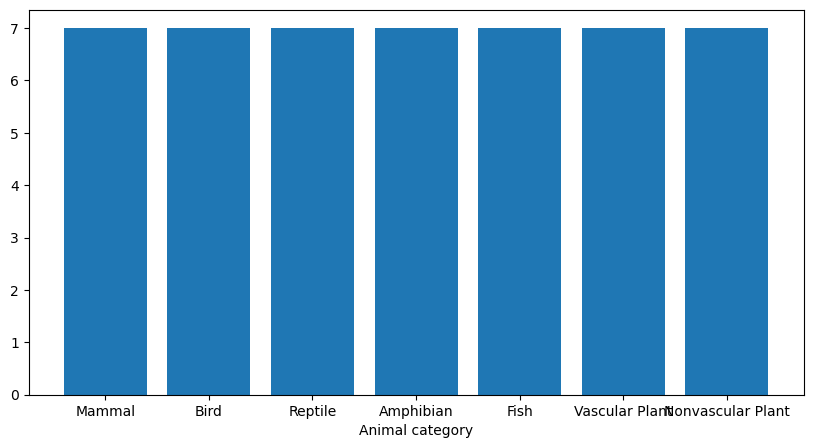

In [279]:
""" total_observations = [];

bio_list = list(range(0, len(biodiversity_df.category)));
category_list = list(biodiversity_df.category);
observ_list = list(biodiversity_df.observations);

for category in biodiversity_df.category.unique():
    obv_count = 0;
    for item in bio_list:
        if category_list[item]== category:
            obv_count+= observ_list[item];
    total_observations.append(obv_count);

print(total_observations);


plt.figure(figsize=(10,5));
ax = plt.subplot();
plt.bar(x=biodiversity_df.category, height= len(total_observations));
plt.xlabel("Animal category");
plt.show(); """